In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

repair_data = pd.read_csv('../repairs.csv')
cache_data = pd.read_csv('../cache.csv')

In [104]:
repair_data.info()
repair_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6174 entries, 0 to 6173
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6174 non-null   int64  
 1   ontology            6174 non-null   object 
 2   failed              6174 non-null   bool   
 3   failed_repair       4877 non-null   object 
 4   steps               4400 non-null   float64
 5   time                4400 non-null   float64
 6   calls               4400 non-null   float64
 7   iic_mcs             4358 non-null   float64
 8   iic_remove          4348 non-null   float64
 9   inf_mcs             4358 non-null   float64
 10  inf_weakening       4358 non-null   float64
 11  inf_remove          4348 non-null   float64
 12  failed_enhance      4400 non-null   object 
 13  steps_enhance       4340 non-null   float64
 14  time_enhance        4340 non-null   float64
 15  calls_enhance       4340 non-null   float64
 16  inf_en

,Unnamed: 0,steps,time,calls,iic_mcs,iic_remove,inf_mcs,inf_weakening,inf_remove,steps_enhance,time_enhance,calls_enhance,inf_enhance,iic_enhance_weaken,iic_enhance_mcs,iic_enhance_remove,iic_mcs_remove
count,6174.000000,4400.000000,4400.000000,4400.000000,4358.000000,4348.000000,4358.000000,4358.000000,4348.000000,4340.000000,4340.000000,4340.000000,4301.000000,4301.000000,4301.000000,4291.000000,4348.000000
mean,3086.500000,2.437500,6760.947500,6746.289091,0.515399,0.595590,2718.612207,2743.865764,2669.261270,14.066129,5097.848618,5697.263825,2877.455708,0.599634,0.614190,0.690109,0.534715
std,1782.424613,5.897372,22399.376864,8113.250815,0.365929,0.332961,3164.818618,3265.417304,3193.365252,51.826790,18607.169561,6748.229582,3390.623695,0.340654,0.366319,0.335372,0.331809
min,0.000000,1.000000,605.000000,535.000000,0.000000,0.000000,120.000000,117.000000,117.000000,1.000000,516.000000,63.000000,119.000000,0.000000,0.000000,0.000000,0.000000
25%,1543.250000,1.000000,1430.000000,2142.500000,0.134342,0.500000,444.250000,406.250000,393.000000,1.000000,953.000000,1426.750000,437.000000,0.375000,0.341463,0.500000,0.301370
50%,3086.500000,1.000000,2143.500000,3934.500000,0.500000,0.500000,875.000000,875.000000,875.000000,2.000000,1422.500000,3029.000000,903.000000,0.573427,0.685573,0.806262,0.500000
75%,4629.750000,2.000000,3805.500000,8165.500000,0.900000,0.997990,5288.750000,5427.000000,5159.250000,7.000000,2313.750000,7056.000000,5704.000000,0.969925,0.993750,1.000000,0.878935
max,6173.000000,143.000000,289736.000000,112949.000000,1.000000,1.000000,18006.000000,17766.000000,17766.000000,1028.000000,296601.000000,81163.000000,18051.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
repair_data['Ontology'] = repair_data['ontology']
repair_data['Has failed'] = repair_data['failed'].map(
    {True: 'Yes', False: 'No'})
repair_data['Has failed weakening'] = repair_data['failed_repair'].map(
    {True: 'Yes', False: 'No'})
repair_data['Weakening steps'] = repair_data['steps']
repair_data['Repair time [ms]'] = repair_data['time']
repair_data['Reasoner calls'] = repair_data['calls']
repair_data['IIC w.r.t. maximal consistent subset'] = repair_data['iic_mcs']
repair_data['IIC w.r.t. repair by removal'] = repair_data['iic_remove']
repair_data['Inferred (weakening)'] = repair_data['inf_weakening']
repair_data['Inferred (MCS)'] = repair_data['inf_mcs']
repair_data['Inferred (removal)'] = repair_data['inf_remove']
repair_data['Weakening steps v2'] = repair_data['steps_enhance']
repair_data['Repair time [ms] v2'] = repair_data['time_enhance']
repair_data['Reasoner calls v2'] = repair_data['calls_enhance']
repair_data['Inferred (weakening v2)'] = repair_data['inf_enhance']
repair_data['v2 IIC w.r.t. maximal consistent subset'] = repair_data['iic_enhance_mcs']
repair_data['v2 IIC w.r.t. repair by removal'] = repair_data['iic_enhance_remove']
repair_data['v2 IIC w.r.t. weakening'] = repair_data['iic_enhance_weaken']
repair_data['MCS IIC w.r.t. removal'] = repair_data['iic_mcs_remove']

In [106]:
cache_data.info()
cache_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37791 entries, 0 to 37790
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37791 non-null  int64  
 1   ontology    37791 non-null  object 
 2   reasoner    37791 non-null  object 
 3   size        37791 non-null  int64  
 4   type        37791 non-null  object 
 5   time        37791 non-null  float64
 6   calls       37791 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ MB


,Unnamed: 0,size,time,calls
count,37791.000000,37791.000000,37791.000000,37791.000000
mean,18895.000000,16.332460,309.677654,7199.666524
std,10909.466348,23.338733,694.406608,11597.458895
min,0.000000,1.000000,0.000000,0.000000
25%,9447.500000,5.000000,29.050000,885.700000
50%,18895.000000,10.000000,81.400000,2324.800000
75%,28342.500000,20.000000,271.400000,7169.005000
max,37790.000000,100.000000,12190.000000,84194.000000


In [107]:
cache_data['Ontology'] = cache_data['ontology']
cache_data['Reasoner'] = cache_data['reasoner'].map(
    {'fact++': 'FaCT++', 'hermit': 'HermiT', 'jfact': 'JFact', 'openllet': 'Openllet'})
cache_data['Weakening steps'] = cache_data['size']
cache_data['Caching strategy'] = cache_data['type'].map(
    {'full': 'Caching using transitivity', 'basic': 'Simple caching', 'uncached': 'No caching'})
cache_data['Time per weakening [ms]'] = cache_data['time']
cache_data['Reasoner calls per weakening'] = cache_data['calls']

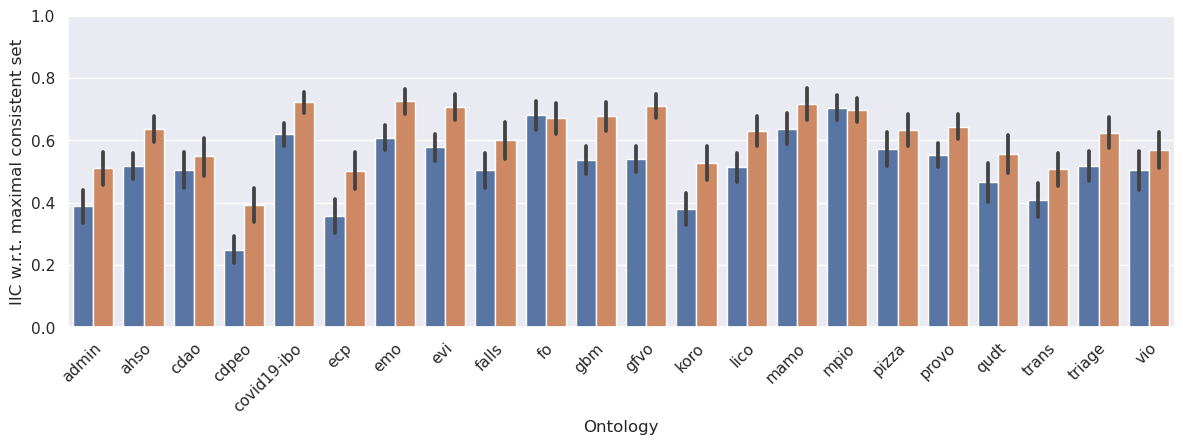

In [108]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data.melt(['Ontology'], ['IIC w.r.t. maximal consistent subset', 'v2 IIC w.r.t. maximal consistent subset'],
                                'Algorithm', 'IIC w.r.t. maximal consistent set'),
            kind='bar', x='Ontology', y='IIC w.r.t. maximal consistent set', height=4, aspect=3, hue='Algorithm', order=order, legend=False, n_boot=5_000)
plt.ylim((0, 1))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-both-mcs-ontology-bar.png', dpi=100, bbox_inches="tight")

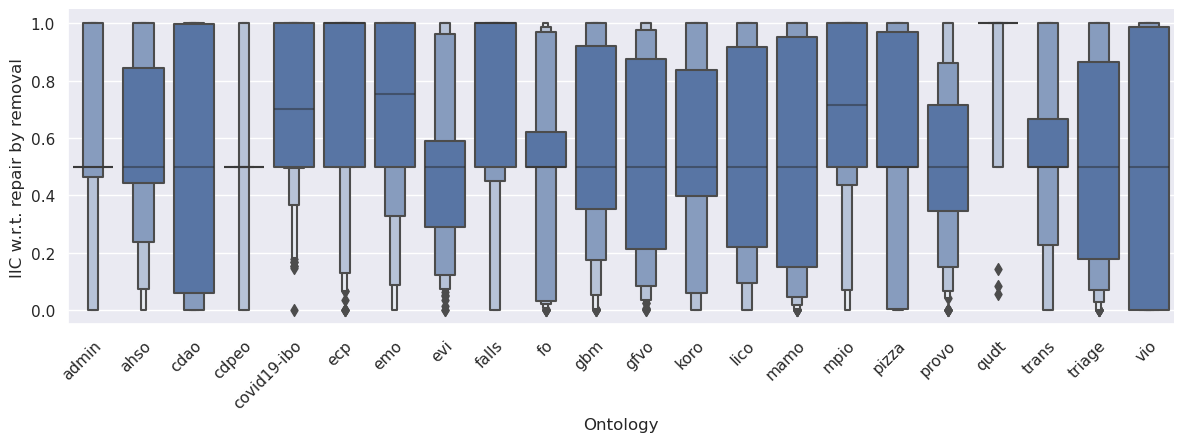

In [109]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-remove-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.56, (0.51, 0.6)), 'ahso': (0.57, (0.52, 0.62)), 'cdao': (0.54, (0.49, 0.61)), 'cdpeo': (0.5, (0.47, 0.53)), 'covid19-ibo': (0.71, (0.67, 0.75)), 'ecp': (0.75, (0.7, 0.8)), 'emo': (0.68, (0.63, 0.72)), 'evi': (0.51, (0.46, 0.55)), 'falls': (0.75, (0.7, 0.81)), 'fo': (0.53, (0.48, 0.58)), 'gbm': (0.59, (0.54, 0.64)), 'gfvo': (0.53, (0.47, 0.58)), 'koro': (0.53, (0.48, 0.58)), 'lico': (0.53, (0.48, 0.59)), 'mamo': (0.55, (0.49, 0.61)), 'mpio': (0.69, (0.65, 0.74)), 'pizza': (0.56, (0.51, 0.62)), 'provo': (0.51, (0.47, 0.56)), 'qudt': (0.96, (0.93, 0.98)), 'trans': (0.56, (0.51, 0.61)), 'triage': (0.51, (0.46, 0.56)), 'vio': (0.48, (0.41, 0.54))}


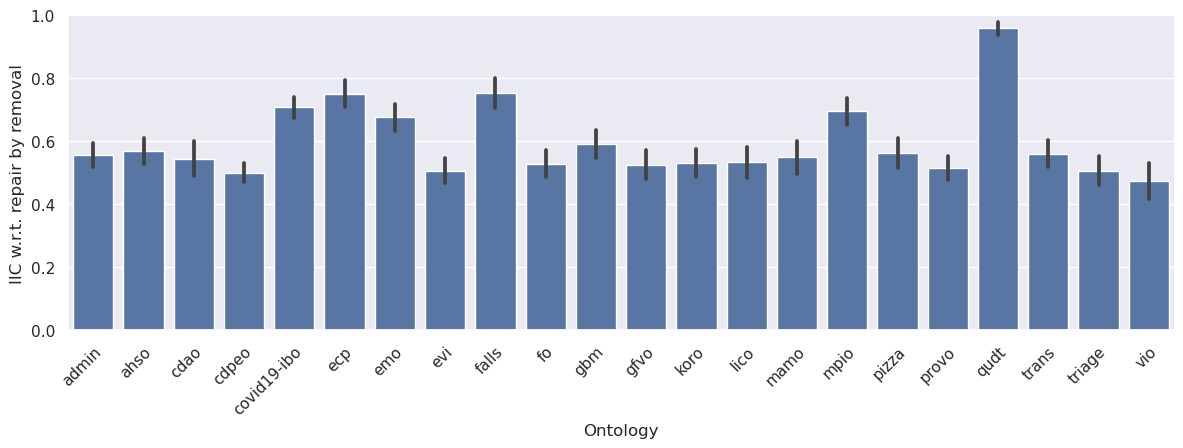

In [110]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-remove-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_remove'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (0.39, (0.33, 0.45)), 'ahso': (0.52, (0.47, 0.56)), 'cdao': (0.51, (0.44, 0.57)), 'cdpeo': (0.25, (0.2, 0.3)), 'covid19-ibo': (0.62, (0.58, 0.66)), 'ecp': (0.36, (0.3, 0.42)), 'emo': (0.61, (0.56, 0.65)), 'evi': (0.58, (0.53, 0.63)), 'falls': (0.5, (0.44, 0.57)), 'fo': (0.68, (0.63, 0.73)), 'gbm': (0.54, (0.49, 0.59)), 'gfvo': (0.54, (0.49, 0.59)), 'koro': (0.38, (0.32, 0.43)), 'lico': (0.51, (0.46, 0.57)), 'mamo': (0.64, (0.58, 0.69)), 'mpio': (0.7, (0.66, 0.75)), 'pizza': (0.57, (0.51, 0.63)), 'provo': (0.55, (0.51, 0.6)), 'qudt': (0.47, (0.4, 0.53)), 'trans': (0.41, (0.35, 0.47)), 'triage': (0.52, (0.47, 0.57)), 'vio': (0.5, (0.44, 0.57))}


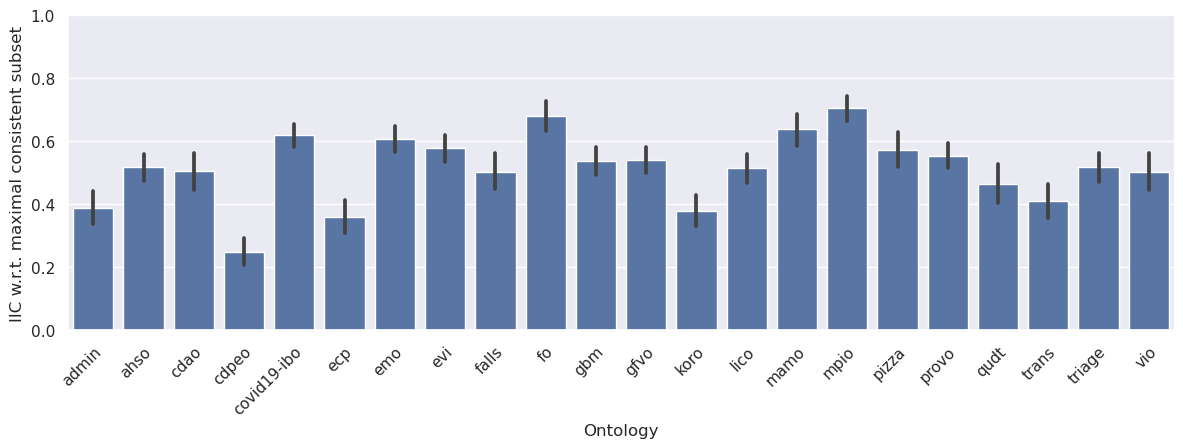

In [111]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-mcs-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_mcs'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

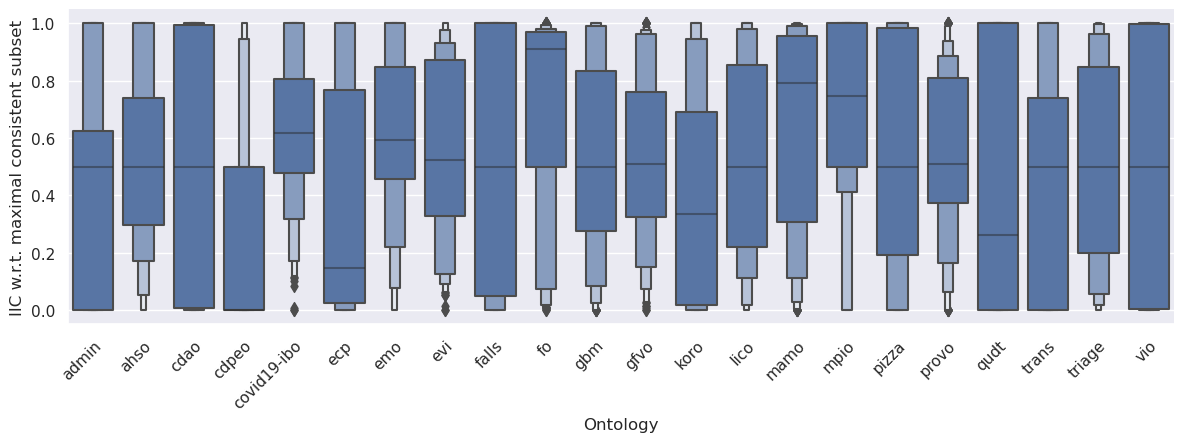

In [112]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-mcs-ontology-violin.png', dpi=100, bbox_inches = "tight")

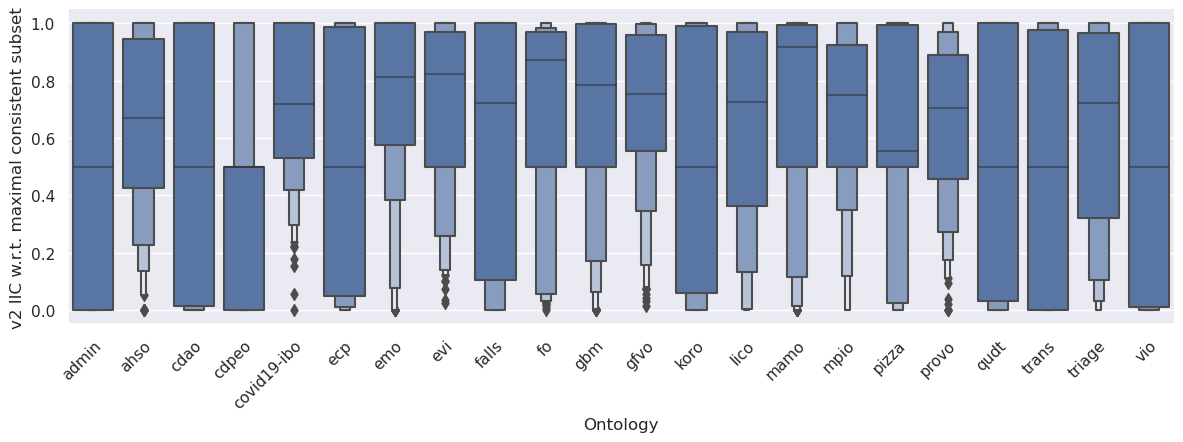

In [113]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='v2 IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-enhance-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.51, (0.45, 0.57)), 'ahso': (0.64, (0.59, 0.69)), 'cdao': (0.55, (0.48, 0.61)), 'cdpeo': (0.39, (0.33, 0.45)), 'covid19-ibo': (0.72, (0.68, 0.76)), 'ecp': (0.5, (0.44, 0.56)), 'emo': (0.73, (0.68, 0.77)), 'evi': (0.71, (0.66, 0.75)), 'falls': (0.6, (0.54, 0.66)), 'fo': (0.67, (0.62, 0.73)), 'gbm': (0.68, (0.63, 0.73)), 'gfvo': (0.71, (0.67, 0.75)), 'koro': (0.53, (0.47, 0.59)), 'lico': (0.63, (0.58, 0.68)), 'mamo': (0.72, (0.66, 0.77)), 'mpio': (0.7, (0.65, 0.74)), 'pizza': (0.63, (0.58, 0.69)), 'provo': (0.64, (0.6, 0.69)), 'qudt': (0.56, (0.49, 0.62)), 'trans': (0.51, (0.45, 0.57)), 'triage': (0.63, (0.57, 0.68)), 'vio': (0.57, (0.51, 0.63))}


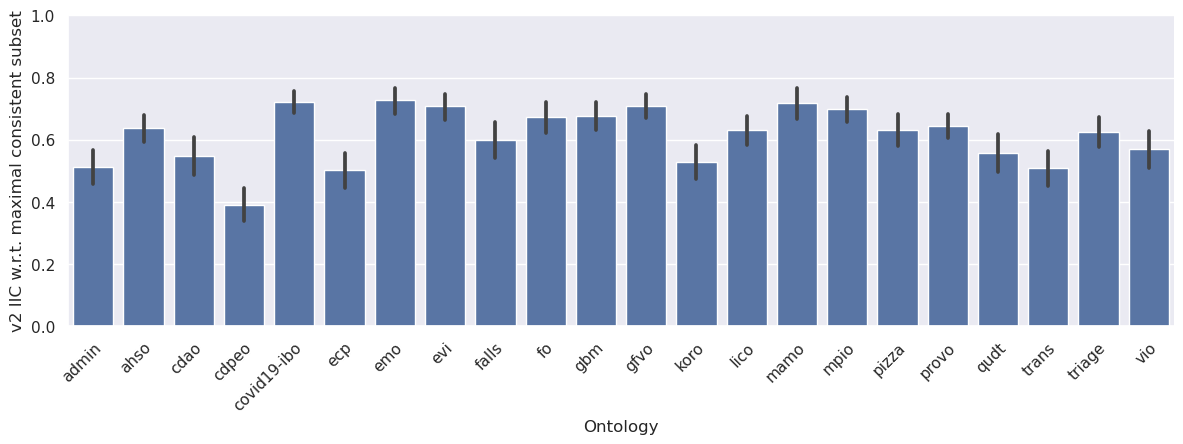

In [114]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='v2 IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-enhance-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_enhance_mcs'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

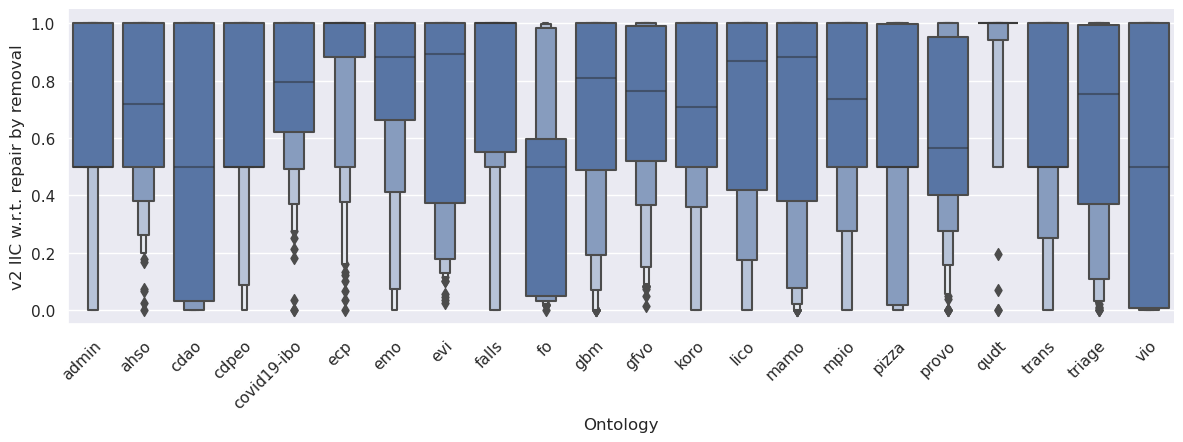

In [115]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='v2 IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-enhance-rem-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.67, (0.62, 0.72)), 'ahso': (0.7, (0.66, 0.74)), 'cdao': (0.58, (0.52, 0.65)), 'cdpeo': (0.66, (0.62, 0.71)), 'covid19-ibo': (0.77, (0.73, 0.81)), 'ecp': (0.86, (0.82, 0.9)), 'emo': (0.77, (0.72, 0.81)), 'evi': (0.68, (0.63, 0.74)), 'falls': (0.79, (0.73, 0.84)), 'fo': (0.48, (0.43, 0.54)), 'gbm': (0.69, (0.64, 0.74)), 'gfvo': (0.72, (0.68, 0.77)), 'koro': (0.68, (0.63, 0.73)), 'lico': (0.69, (0.64, 0.75)), 'mamo': (0.68, (0.63, 0.74)), 'mpio': (0.67, (0.62, 0.72)), 'pizza': (0.61, (0.55, 0.66)), 'provo': (0.64, (0.59, 0.68)), 'qudt': (0.94, (0.91, 0.97)), 'trans': (0.64, (0.59, 0.69)), 'triage': (0.65, (0.59, 0.71)), 'vio': (0.57, (0.51, 0.63))}


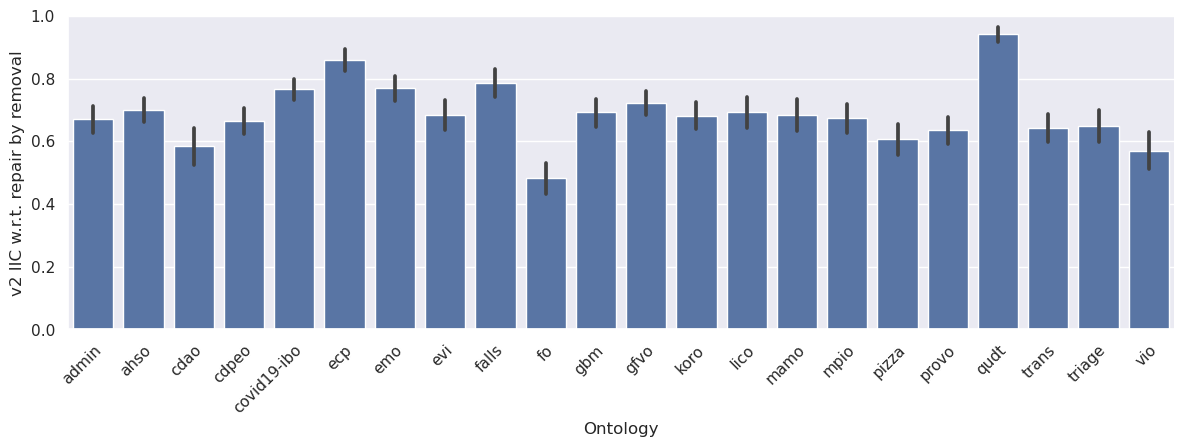

In [116]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='v2 IIC w.r.t. repair by removal', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-enhance-rem-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_enhance_remove'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

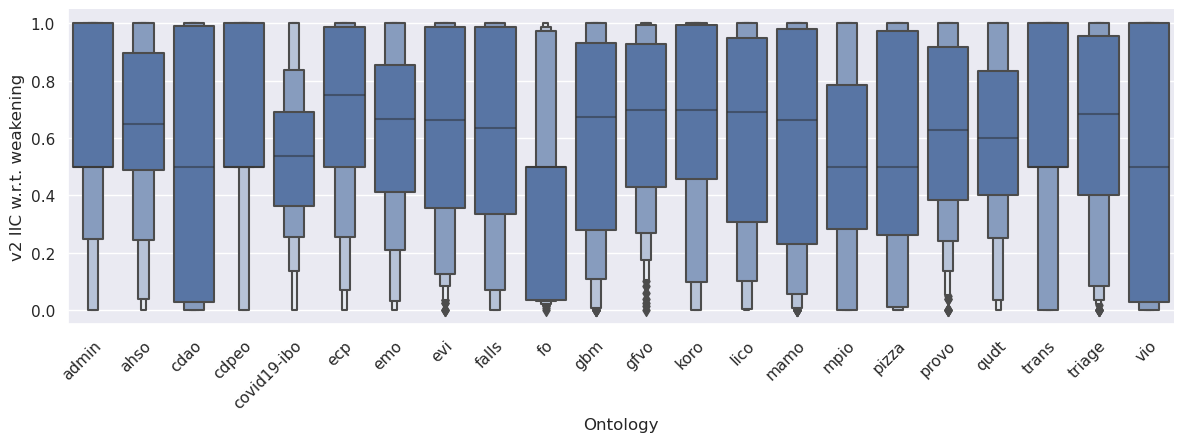

In [117]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='v2 IIC w.r.t. weakening', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-enhance-weaken-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.64, (0.59, 0.69)), 'ahso': (0.63, (0.58, 0.68)), 'cdao': (0.55, (0.49, 0.61)), 'cdpeo': (0.67, (0.62, 0.72)), 'covid19-ibo': (0.54, (0.5, 0.58)), 'ecp': (0.68, (0.63, 0.73)), 'emo': (0.61, (0.57, 0.66)), 'evi': (0.63, (0.58, 0.68)), 'falls': (0.61, (0.56, 0.66)), 'fo': (0.44, (0.39, 0.5)), 'gbm': (0.61, (0.55, 0.66)), 'gfvo': (0.66, (0.61, 0.7)), 'koro': (0.64, (0.58, 0.69)), 'lico': (0.61, (0.56, 0.67)), 'mamo': (0.59, (0.53, 0.64)), 'mpio': (0.52, (0.46, 0.57)), 'pizza': (0.54, (0.48, 0.59)), 'provo': (0.62, (0.57, 0.67)), 'qudt': (0.59, (0.55, 0.64)), 'trans': (0.6, (0.54, 0.65)), 'triage': (0.63, (0.58, 0.69)), 'vio': (0.58, (0.51, 0.64))}


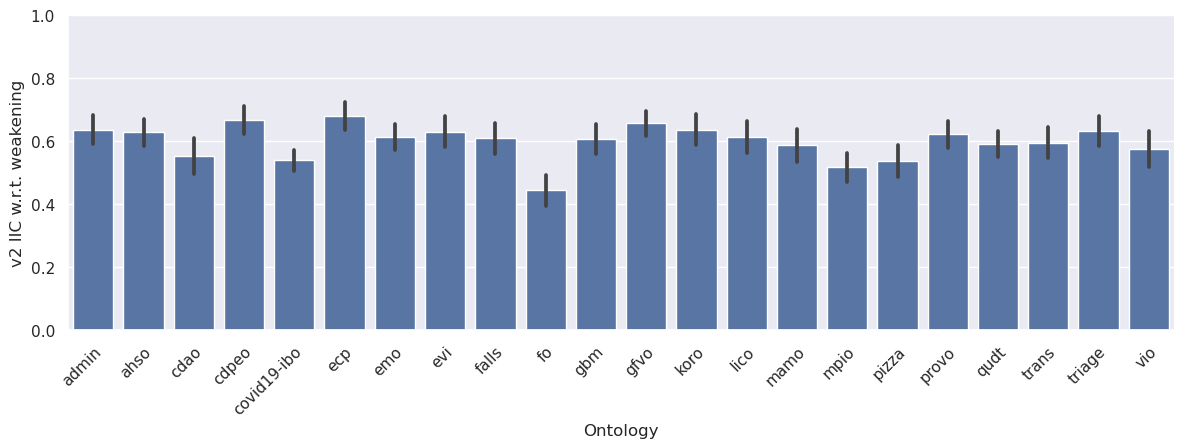

In [4]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='v2 IIC w.r.t. weakening', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-enhance-weaken-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_enhance_weaken'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

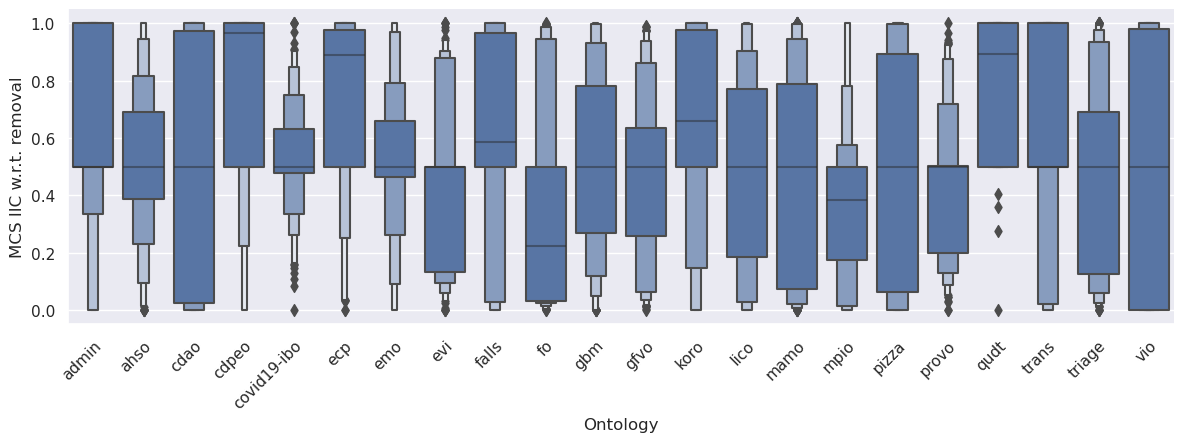

In [119]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='boxen', x='Ontology',
            y='MCS IIC w.r.t. removal', height=4, aspect=3, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/iic-mcs-rem-ontology-violin.png', dpi=100, bbox_inches = "tight")

{'admin': (0.66, (0.61, 0.71)), 'ahso': (0.52, (0.48, 0.56)), 'cdao': (0.51, (0.45, 0.57)), 'cdpeo': (0.74, (0.69, 0.79)), 'covid19-ibo': (0.53, (0.5, 0.56)), 'ecp': (0.74, (0.7, 0.79)), 'emo': (0.53, (0.49, 0.57)), 'evi': (0.42, (0.38, 0.47)), 'falls': (0.64, (0.59, 0.69)), 'fo': (0.34, (0.29, 0.39)), 'gbm': (0.51, (0.46, 0.56)), 'gfvo': (0.46, (0.42, 0.51)), 'koro': (0.64, (0.59, 0.69)), 'lico': (0.48, (0.43, 0.53)), 'mamo': (0.43, (0.38, 0.49)), 'mpio': (0.37, (0.33, 0.41)), 'pizza': (0.48, (0.42, 0.53)), 'provo': (0.43, (0.39, 0.47)), 'qudt': (0.75, (0.71, 0.79)), 'trans': (0.65, (0.6, 0.71)), 'triage': (0.46, (0.41, 0.51)), 'vio': (0.44, (0.38, 0.5))}


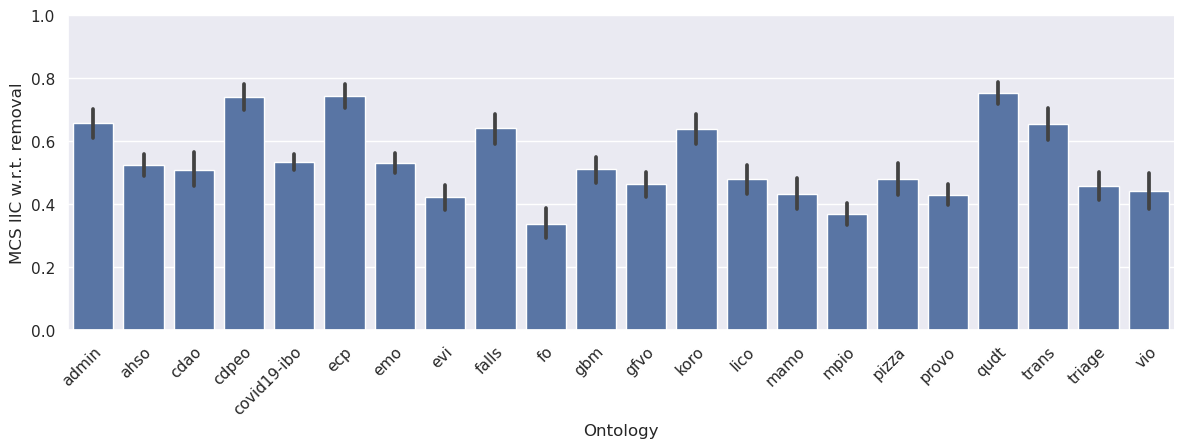

In [120]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='MCS IIC w.r.t. removal', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-mcs-rem-ontology-bar.png', dpi=100, bbox_inches = "tight")
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['iic_mcs_remove'].mean(), 2), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (218, (211, 226)), 'ahso': (712, (685, 738)), 'cdao': (2637, (2364, 2937)), 'cdpeo': (171, (169, 173)), 'covid19-ibo': (6362, (6028, 6673)), 'ecp': (260, (247, 274)), 'emo': (6055, (5763, 6353)), 'evi': (771, (750, 792)), 'falls': (225, (211, 240)), 'fo': (964, (936, 989)), 'gbm': (5687, (5463, 5910)), 'gfvo': (8126, (7925, 8319)), 'koro': (991, (967, 1017)), 'lico': (6166, (5881, 6433)), 'mamo': (8422, (7974, 8858)), 'mpio': (465, (446, 484)), 'pizza': (6077, (5695, 6461)), 'provo': (738, (721, 754)), 'qudt': (524, (478, 578)), 'trans': (363, (355, 371)), 'triage': (750, (717, 784)), 'vio': (2087, (1826, 2362))}


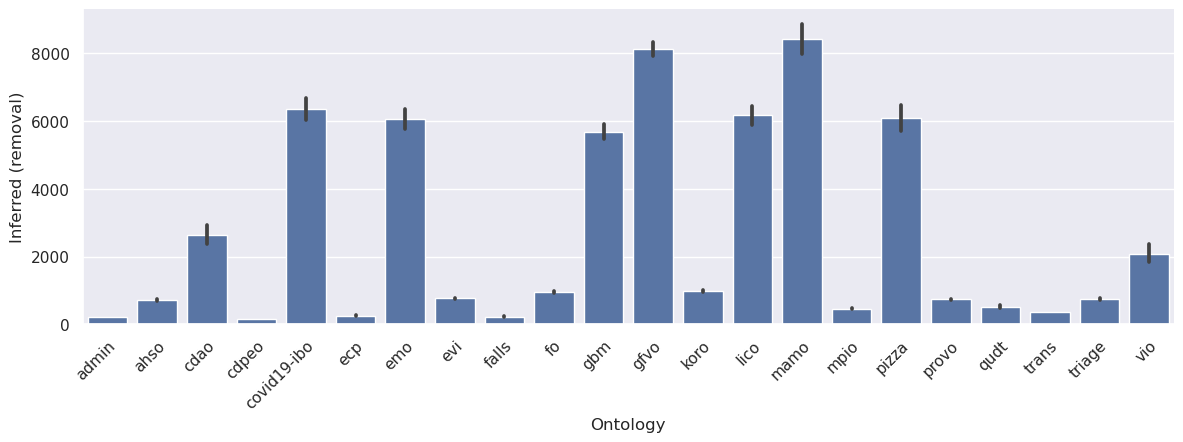

In [121]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inferred (removal)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['inf_remove'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (318, (287, 352)), 'ahso': (717, (691, 743)), 'cdao': (2841, (2529, 3178)), 'cdpeo': (193, (187, 199)), 'covid19-ibo': (6517, (6185, 6839)), 'ecp': (412, (384, 441)), 'emo': (6115, (5830, 6420)), 'evi': (736, (714, 756)), 'falls': (247, (232, 263)), 'fo': (924, (900, 947)), 'gbm': (5827, (5621, 6020)), 'gfvo': (7940, (7733, 8133)), 'koro': (1311, (1214, 1419)), 'lico': (6251, (5996, 6504)), 'mamo': (8208, (7812, 8591)), 'mpio': (413, (395, 430)), 'pizza': (6404, (6046, 6759)), 'provo': (714, (695, 733)), 'qudt': (613, (549, 686)), 'trans': (441, (413, 471)), 'triage': (743, (712, 773)), 'vio': (2017, (1788, 2255))}


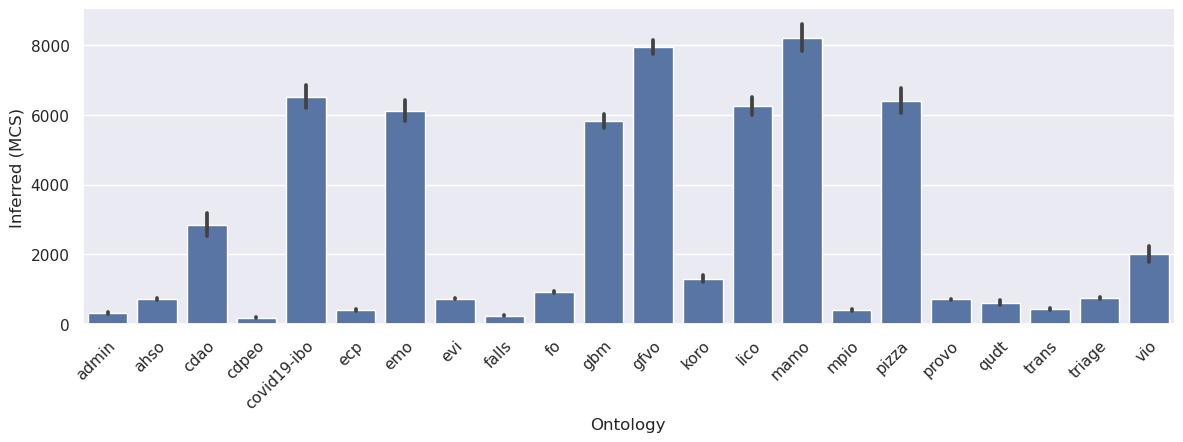

In [122]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inferred (MCS)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['inf_mcs'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (255, (237, 274)), 'ahso': (704, (680, 728)), 'cdao': (2592, (2317, 2889)), 'cdpeo': (171, (169, 173)), 'covid19-ibo': (6696, (6364, 7001)), 'ecp': (271, (256, 286)), 'emo': (6318, (6027, 6622)), 'evi': (766, (745, 786)), 'falls': (234, (219, 251)), 'fo': (980, (957, 1001)), 'gbm': (5796, (5577, 6007)), 'gfvo': (8202, (8018, 8373)), 'koro': (1015, (986, 1046)), 'lico': (6150, (5870, 6417)), 'mamo': (8945, (8558, 9304)), 'mpio': (483, (462, 503)), 'pizza': (6437, (6071, 6814)), 'provo': (737, (720, 753)), 'qudt': (539, (491, 594)), 'trans': (379, (369, 390)), 'triage': (727, (695, 759)), 'vio': (2074, (1814, 2337))}


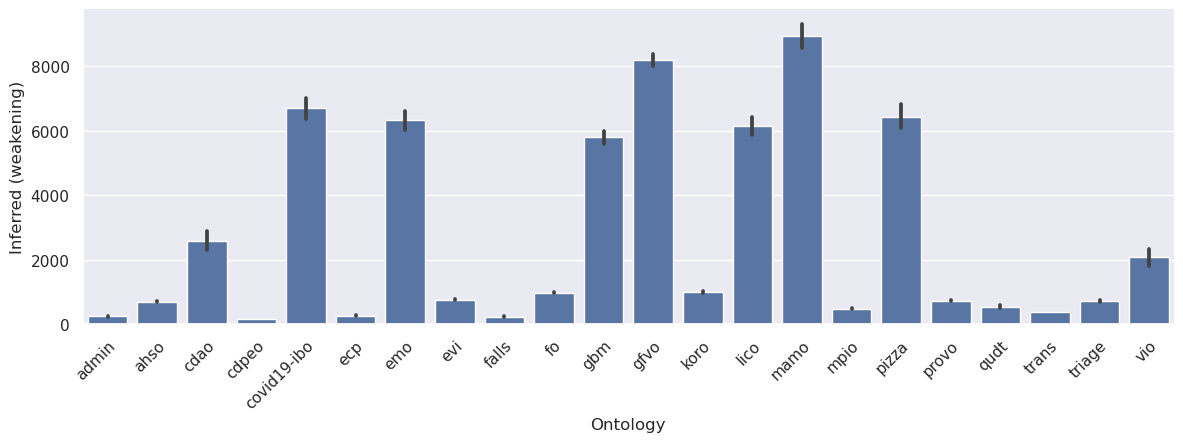

In [123]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inferred (weakening)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['inf_weakening'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (290, (265, 317)), 'ahso': (757, (730, 784)), 'cdao': (2843, (2494, 3202)), 'cdpeo': (179, (176, 183)), 'covid19-ibo': (6832, (6499, 7155)), 'ecp': (345, (320, 370)), 'emo': (6625, (6328, 6925)), 'evi': (785, (764, 804)), 'falls': (248, (232, 265)), 'fo': (979, (959, 997)), 'gbm': (6062, (5850, 6269)), 'gfvo': (8766, (8613, 8907)), 'koro': (1243, (1156, 1343)), 'lico': (6532, (6284, 6766)), 'mamo': (9071, (8647, 9462)), 'mpio': (479, (458, 500)), 'pizza': (6694, (6268, 7102)), 'provo': (759, (742, 774)), 'qudt': (560, (508, 617)), 'trans': (408, (389, 428)), 'triage': (775, (742, 808)), 'vio': (2264, (2009, 2530))}


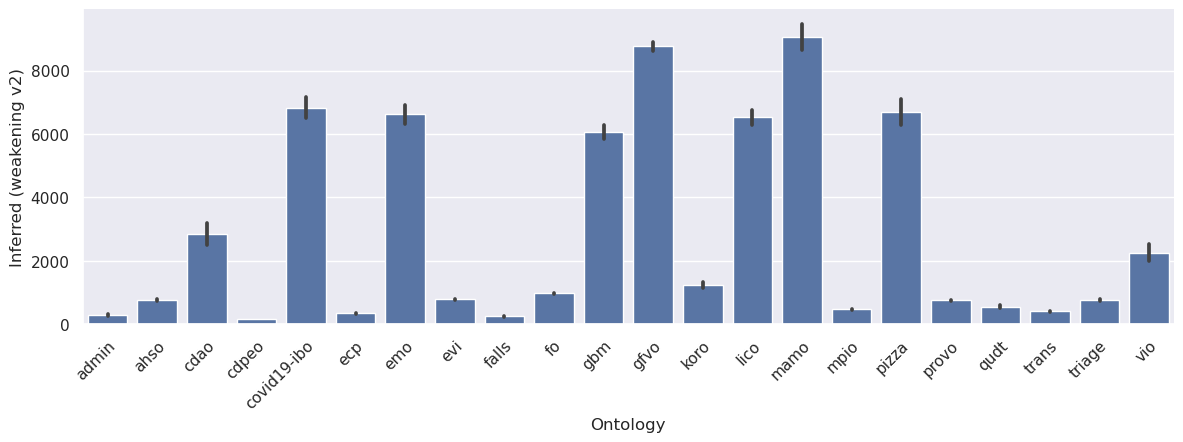

In [124]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='Inferred (weakening v2)', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
lower = [round(line.get_ydata().min() - 0.5) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.5) for line in facet.ax.lines]
print({order[i]: (round(repair_data[repair_data['Ontology'] == order[i]]
      ['inf_enhance'].mean()), ci) for i, ci in enumerate(zip(lower, upper))})

iic_remove 0.6 ((0.58, 0.61),)
iic_mcs 0.52 ((0.5, 0.53),)
iic_enhance_remove 0.69 ((0.67, 0.7),)
iic_enhance_mcs 0.61 ((0.6, 0.63),)
iic_enhance_weaken 0.6 ((0.58, 0.61),)
iic_mcs_remove 0.53 ((0.52, 0.55),)


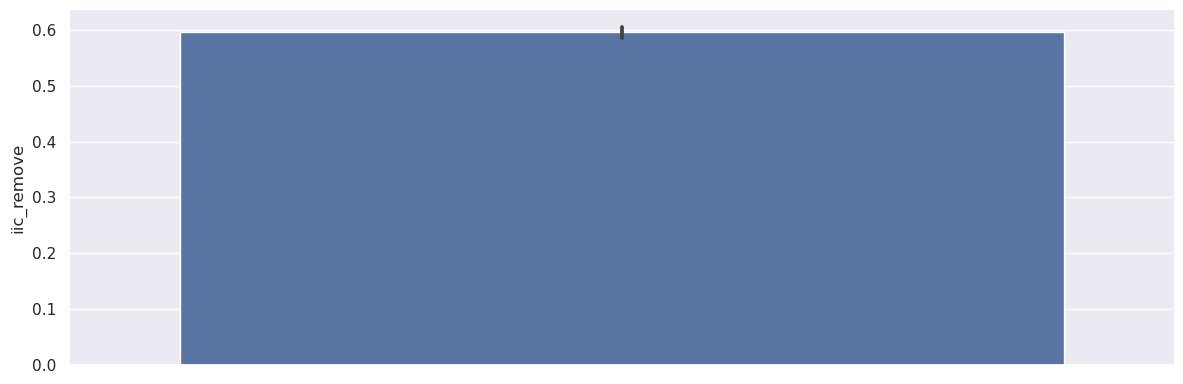

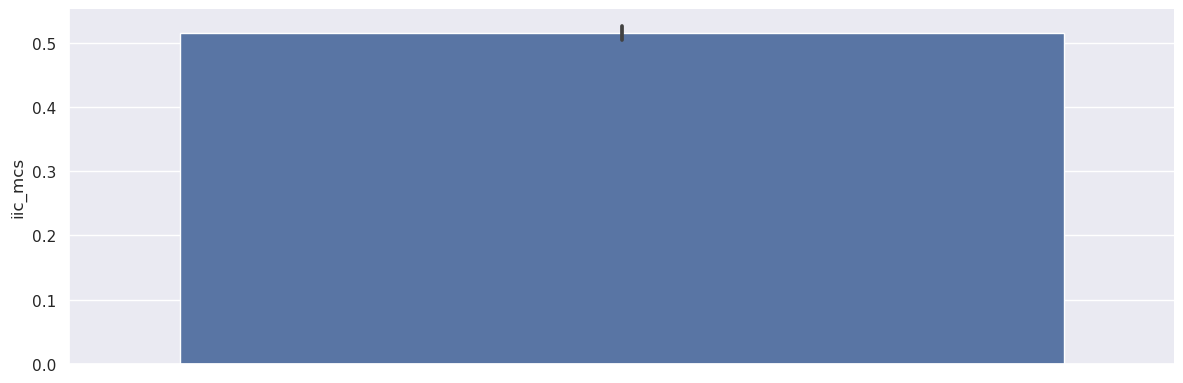

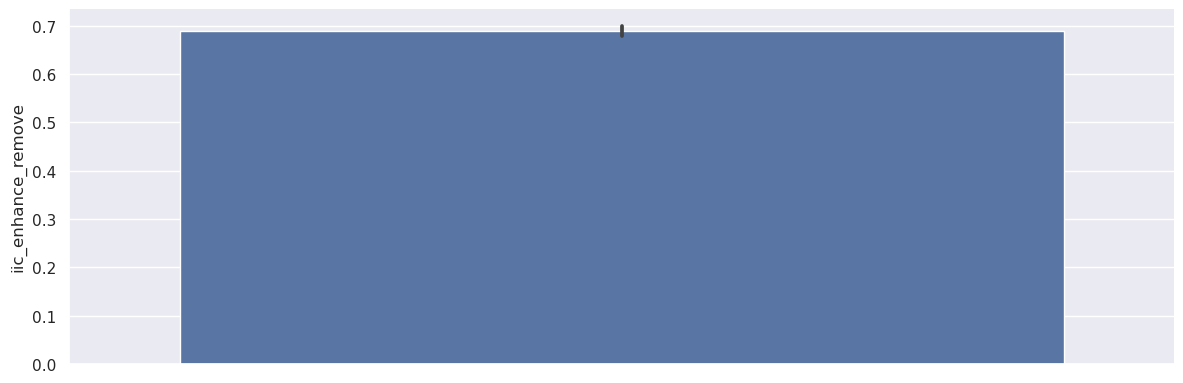

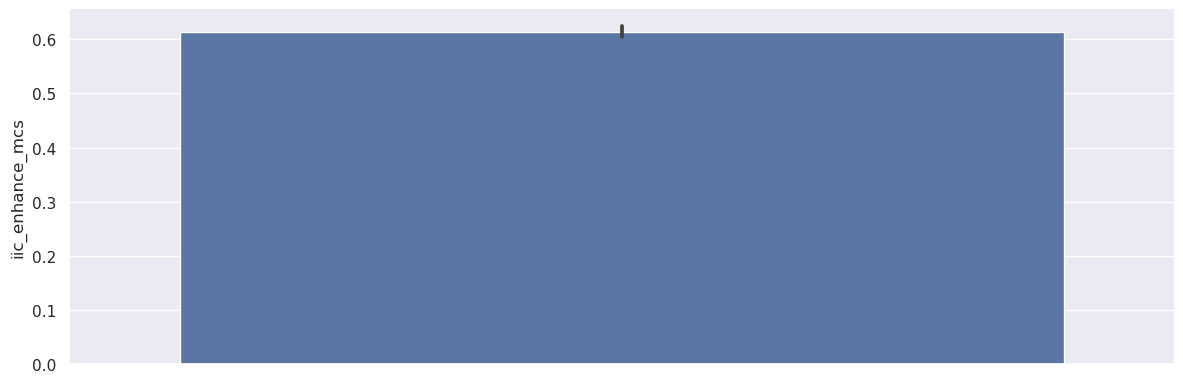

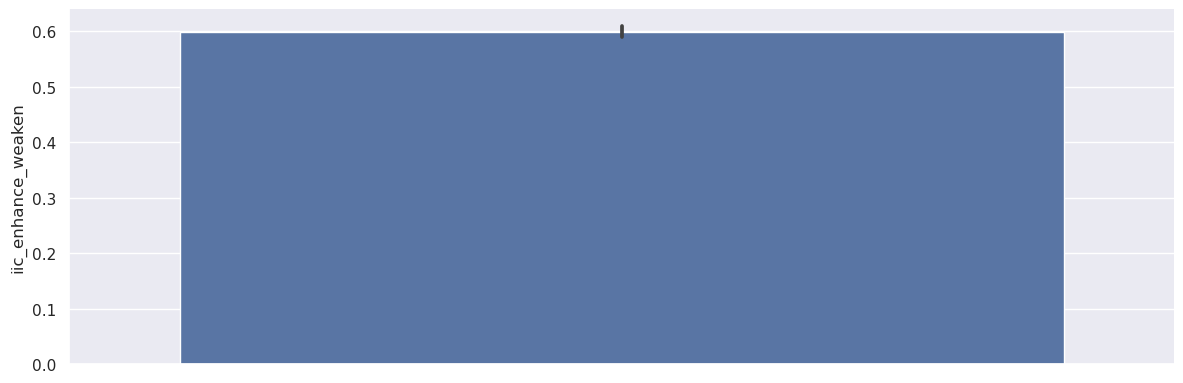

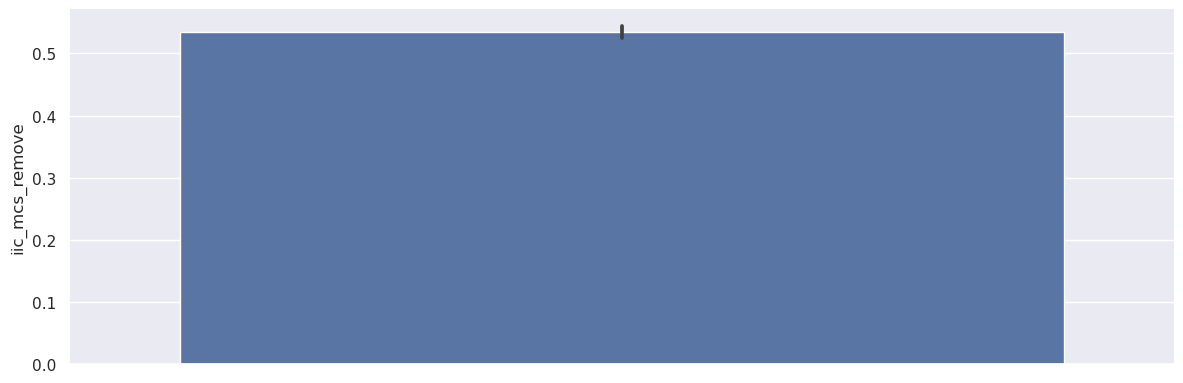

In [125]:
facet = sns.catplot(data=repair_data, kind='bar', y='iic_remove', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_remove', round(repair_data['iic_remove'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_mcs', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_mcs', round(repair_data['iic_mcs'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_enhance_remove', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_enhance_remove', round(repair_data['iic_enhance_remove'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_enhance_mcs', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_enhance_mcs', round(repair_data['iic_enhance_mcs'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_enhance_weaken', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_enhance_weaken', round(repair_data['iic_enhance_weaken'].mean(), 2), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_mcs_remove', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
lower = [round(line.get_ydata().min() - 0.005, 2) for line in facet.ax.lines]
upper = [round(line.get_ydata().max() + 0.005, 2) for line in facet.ax.lines]
print('iic_mcs_remove', round(repair_data['iic_mcs_remove'].mean(), 2), tuple(zip(lower, upper)))